In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta,TH
import warnings
warnings.filterwarnings('ignore')
!pip install opstrat
import opstrat as op
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
from breeze_connect import BreezeConnect

# Initialize SDK
breeze = BreezeConnect(api_key="f65&396497Vq0161W2d18ngV35%5755@")

# Obtain your session key from https://api.icicidirect.com/apiuser/login?api_key=YOUR_API_KEY
# Incase your api-key has special characters(like +,=,!) then encode the api key before using in the url as shown below.
import urllib
print("https://api.icicidirect.com/apiuser/login?api_key="+urllib.parse.quote_plus("your_api_key"))

# Generate Session
breeze.generate_session(api_secret="5l88!0708cJ04~74!X1V71a90j4~392+",
                        session_token="7249806")

https://api.icicidirect.com/apiuser/login?api_key=your_api_key


In [3]:
n = breeze.get_historical_data_v2(interval="1day",
                            from_date= "2021-01-01T07:00:00.000Z",
                            to_date= "2022-01-01T07:00:00.000Z",
                            stock_code="NIFTY",
                            exchange_code="NSE",
                            product_type="cash")
nifty =pd.DataFrame(n['Success'])
nifty.index = nifty.datetime
nifty.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume'}  , inplace = True)
nifty.rename( {'datetime' : 'date'} , inplace = True)
nifty['Expiry'] = 0
for i in range (len(nifty)) :
    nifty['Expiry'].iloc[i] = pd.to_datetime(nifty.index[i]).date() + relativedelta( weekday=TH(+1))
    nifty['weekday'] = pd.to_datetime(nifty['Expiry'][i]).weekday()
nifty['close'] = nifty['close'].astype(float).astype(int)
nifty['pc'] = nifty.close.shift(1)
nifty['open'] = nifty['open'].astype(float).astype(int)
#nifty['pc'] = nifty['pc'].astype(float).astype(int)
nifty['ovi%'] = ( (nifty.open - nifty.pc)/(nifty.open) )*100
nifty[60:70]
#pd.to_datetime(nifty['Expiry'][0]).weekday()

,close,high,low,open,Expiry,weekday,pc,ovi%
datetime,,,,,,,,
2021-03-31 00:00:00,14690,14813.75,14670.25,14811,2021-04-01,3,14853.0,-0.283573
2021-04-01 00:00:00,14864,14883.20,14692.45,14798,2021-04-01,3,14690.0,0.729828
2021-04-05 00:00:00,14650,14849.85,14459.50,14837,2021-04-08,3,14864.0,-0.181977
2021-04-06 00:00:00,14699,14779.10,14573.90,14737,2021-04-08,3,14650.0,0.590351
2021-04-07 00:00:00,14808,14879.80,14649.85,14716,2021-04-08,3,14699.0,0.115521
2021-04-08 00:00:00,14877,14984.15,14821.10,14875,2021-04-08,3,14808.0,0.450420
2021-04-09 00:00:00,14838,14918.45,14785.65,14882,2021-04-15,3,14877.0,0.033598
2021-04-12 00:00:00,14354,14652.50,14248.70,14644,2021-04-15,3,14838.0,-1.324775
2021-04-13 00:00:00,14525,14528.90,14274.90,14364,2021-04-15,3,14354.0,0.069618


In [4]:
def nifty_intraday_data(dn1) : 
    ni = breeze.get_historical_data_v2(interval="5minute",
                            from_date= nifty.index[dn1][0:10] + 'T07:' + nifty.index[dn1][11 : 16] + '.' + '000Z' ,
                            #to_date= nifty.index[dn][0:10].replace(nifty.index[dn][8:10] , str(int(nifty.index[dn][8:10])/10 + 0.1)[0] + str(int(nifty.index[dn][8:10])/10 + 0.1)[2]) + 'T07:' + nifty.index[dn][11 : 16] + '.' + '000Z'
                            #to_date = nifty.index[dn][0:10].replace(nifty.index[dn][8:10] , str(round(((int((nifty.index[dn][8:10]))/10 ) + 0.1)*10)/10)[0] + str(round(((int((nifty.index[dn][8:10]))/10 ) + 0.1)*10)/10)[2]) + 'T07:' + nifty.index[dn][11 : 16] + '.' + '000Z'   
                            to_date =  nifty.index[dn1+1][0:10] + 'T07:' + nifty.index[dn1][11 : 16] + '.' + '000Z' ,         
                            stock_code="NIFTY",
                            exchange_code="NSE", 
                            product_type="cash")
    nifty_intraday =pd.DataFrame(ni['Success'])
    #print(nifty.index[dn][0:10] + 'T07:' + nifty.index[dn][11 : 16] + '.' + '000Z')
    #print(nifty.index[dn+1][0:10] + 'T07:' + nifty.index[dn][11 : 16] + '.' + '000Z')
    nifty_intraday.index = nifty_intraday.datetime
    nifty_intraday.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume'}  , inplace = True)
    nifty_intraday.rename( {'datetime' : 'date'} , inplace = True)
    nifty_intraday.rename_axis('date' , inplace = True)
    #nifty_intraday['Expiry'] = 0
    #for i in range (len(nifty_intraday)) :
        #nifty_intraday['Expiry'][i] = pd.to_datetime(nifty_intraday.index[i]).date() + relativedelta(day=31, weekday=TH(-1))
        
    #nifty_intraday.close.asty
    return  nifty_intraday
    #print(nifty.index[dn][0:10] + 'T07:' + nifty.index[dn][11 : 16] + '.' + '000Z')
    #print(nifty.index[dn+1][0:10] + 'T07:' + nifty.index[dn][11 : 16] + '.' + '000Z')
    #print(nifty.index[dn][0:10].replace(nifty.index[dn][8:10] , str(int(nifty.index[dn][8:10])/10 + 0.1)[0] + str(int(nifty.index[dn][8:10])/10 + 0.1)[2]) + 'T07:' + nifty.index[dn][11 : 16] + '.' + '000Z')
    #print(nifty.index[dn][0:10].replace(nifty.index[dn][8:10] , str(round(((int((nifty.index[dn][8:10]))/10 ) + 0.1)*10)/10)[0] + str(round(((int((nifty.index[dn][8:10]))/10 ) + 0.1)*10)/10)[2]) + 'T07:' + nifty.index[dn][11 : 16] + '.' + '000Z')
    #print(nifty_intraday)
np.array(nifty_intraday_data(12).close)


array(['14371.65', '14404.95', '14404.05', '14404.00', '14392.45',
       '14373.35', '14367.30', '14376.65', '14386.20', '14379.70',
       '14393.50', '14403.55', '14412.50', '14409.40', '14416.00',
       '14436.65', '14439.50', '14431.45', '14439.85', '14453.40',
       '14443.35', '14450.85', '14446.55', '14445.10', '14433.00',
       '14431.70', '14438.75', '14441.75', '14445.60', '14444.70',
       '14436.60', '14463.20', '14471.85', '14464.90', '14463.55',
       '14471.25', '14468.85', '14461.65', '14461.80', '14468.80',
       '14468.80', '14462.35', '14467.05', '14460.20', '14465.35',
       '14482.15', '14482.85', '14483.05', '14481.15', '14485.05',
       '14486.95', '14484.45', '14477.55', '14487.60', '14497.50',
       '14499.00', '14506.25', '14497.40', '14495.85', '14499.75',
       '14495.75', '14500.05', '14496.00', '14499.70', '14514.70',
       '14524.00', '14536.75', '14538.70', '14540.40', '14539.35',
       '14522.75', '14523.05', '14526.75', '14519.05', '14511.

In [16]:
def intaraday_options_data(dn2 ) :
    strike_multiple = 50
    atm_strike_price = strike_multiple*(round(int(float(nifty_intraday_data(dn2-1).iloc[75].close))/ strike_multiple))
    #atm_strike_price
    #atm_strike_price = sp
    b =str(nifty.iloc[dn2]['Expiry'].year ) + '-' + str(nifty.iloc[dn2]['Expiry'].month ) + '-' + str(nifty.iloc[dn2]['Expiry'].day ) + 'T07:00:00.000Z'
    if b[6] == '-':
        b=  b[0:5] + '0' + b[5:23]
    if b[9] == 'T' :
         b = b[0:8] + '0' + b[8:23]
   
    
    s = nifty.index[dn2][0:10] + 'T07:' + nifty.index[dn2][11 : 16] + '.' + '000Z'
    #ii = list(nifty.index[dn][0:10])
    #ii[8:10] = str(int(nifty.index[dn][8:10])/10 + 0.1)[0] + str(int(nifty.index[dn][8:10])/10 + 0.1)[2]
    #g = ''.join(ii)
    #hh = g + 'T07:' + nifty.index[dn][11 : 16] + '.' + '000Z'
    #hh = nifty.index[dn][0:10].replace(nifty.index[dn][8:10] , str(round(((int((nifty.index[dn][8:10]))/10 ) + 0.1)*10)/10)[0] + str(round(((int((nifty.index[dn][8:10]))/10 ) + 0.1)*10)/10)[2]) + 'T07:' + nifty.index[dn][11 : 16] + '.' + '000Z'
    hh = nifty.index[dn2+1][0:10] + 'T07:' + nifty.index[dn2+1][11 : 16] + '.' + '000Z'
    #e=nifty.index[dn][0:10].replace(nifty.index[dn][8:10] , str(int(nifty.index[dn][8:10])/10 + 0.1)[0] + str(int(nifty.index[dn][8:10])/10 + 0.1)[2]) + 'T07:' + nifty.index[dn][11 : 16] + '.' + '000Z'
    i111 = breeze.get_historical_data_v2(interval="5minute",
                            from_date = s ,
                            to_date = hh ,
                            stock_code="NIFTY",
                            exchange_code="NFO",
                            product_type="options",
                            expiry_date= b ,
                            right="call",
                            strike_price=atm_strike_price+500)
    o1=pd.DataFrame(i111['Success'])
    o1.index = o1.datetime
    o1.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume' , 'open_interest' ,'product_type','open', 'high','low'}, inplace = True)
    o1.rename( {'datetime' : 'date'} , inplace = True)
    o1.rename_axis('date' , inplace = True)
    i11 = breeze.get_historical_data_v2(interval="5minute",
                            from_date = s ,
                            to_date = hh ,
                            stock_code="NIFTY",
                            exchange_code="NFO",
                            product_type="options",
                            expiry_date= b ,
                            right="call",
                            strike_price=atm_strike_price)
    o=pd.DataFrame(i11['Success'])
    o.index = o.datetime
    o.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume' , 'open_interest' ,'product_type','open', 'high','low'}, inplace = True)
    o.rename( {'datetime' : 'date'} , inplace = True)
    o.rename_axis('date' , inplace = True)
    j = breeze.get_historical_data_v2(interval="5minute",
                            from_date = s ,
                            to_date = hh,
                            stock_code="NIFTY",
                            exchange_code="NFO",
                            product_type="options",
                            expiry_date= b ,
                            right="put" ,
                            strike_price=atm_strike_price)
    j1= pd.DataFrame(j['Success'])
    j1.index = j1.datetime
    j1.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume' , 'open_interest' ,'product_type','open', 'high','low'},inplace = True)
    j1.rename( {'datetime' : 'date'} , inplace = True)
    j1.rename_axis('date' , inplace = True)
    j2 = breeze.get_historical_data_v2(interval="5minute",
                            from_date = s ,
                            to_date = hh,
                            stock_code="NIFTY",
                            exchange_code="NFO",
                            product_type="options",
                            expiry_date= b ,
                            right="put" ,
                            strike_price=atm_strike_price-50)
    j3= pd.DataFrame(j2['Success'])
    j3.index = j3.datetime
    j3.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume' , 'open_interest' ,'product_type','open', 'high','low'},inplace = True)
    j3.rename( {'datetime' : 'date'} , inplace = True)
    j3.rename_axis('date' , inplace = True)
    straddle = pd.DataFrame()
    straddle = {'datetime' : ['09:15' , '09:15' ,'09:15' , '09:15' ] ,
                'Type' : ['CE' , 'CE' , 'PE' , 'PE'] ,
                'Position': ['1' , '-1' , '-1' , '1'] }
    p =pd.DataFrame(straddle)
    p['Premium'] = [o1.close.iloc[1] , o.close.iloc[1] , j1.close.iloc[1] , j3.close.iloc[1]]
    p['Strike Price'] = [atm_strike_price + 500 ,  atm_strike_price , atm_strike_price, atm_strike_price - 50]
    p['Position'] = p['Position'].astype(float).astype(int)
    p['Premium'] = p['Premium'].astype(float).astype(int)
    p['Strike Price'] = p['Strike Price'].astype(float).astype(int)
   
    return o ,o1,j1, j3 , p
    #return o
    #print(s)
    #print(hh)
    #print(b)
    #print(o)
    #print(atm_strike_price)
intaraday_options_data(12)

(                      close  expiry_date right strike_price
 date                                                       
 2021-01-19 09:15:00  194.70  21-JAN-2021  Call        14250
 2021-01-19 09:20:00  201.80  21-JAN-2021  Call        14250
 2021-01-19 09:25:00  197.65  21-JAN-2021  Call        14250
 2021-01-19 09:30:00  191.40  21-JAN-2021  Call        14250
 2021-01-19 09:35:00  187.95  21-JAN-2021  Call        14250
 ...                     ...          ...   ...          ...
 2021-01-19 15:05:00  316.15  21-JAN-2021  Call        14250
 2021-01-19 15:10:00  324.00  21-JAN-2021  Call        14250
 2021-01-19 15:15:00  317.05  21-JAN-2021  Call        14250
 2021-01-19 15:20:00  312.95  21-JAN-2021  Call        14250
 2021-01-19 15:25:00  324.95  21-JAN-2021  Call        14250
 
 [75 rows x 4 columns],
                      close  expiry_date right strike_price
 date                                                      
 2021-01-19 09:15:00  11.60  21-JAN-2021  Call        14750
 

In [17]:
def previous_intaraday_options_data(dn2 ) :
    dn2 = dn2 -1
    strike_multiple = 50
    atm_strike_price = strike_multiple*(round(int(float(nifty_intraday_data(dn2).iloc[75].close))/ strike_multiple))
    #atm_strike_price
    b =str(nifty.iloc[dn2]['Expiry'].year ) + '-' + str(nifty.iloc[dn2]['Expiry'].month ) + '-' + str(nifty.iloc[dn2]['Expiry'].day ) + 'T07:00:00.000Z'
    if b[6] == '-':
        b=  b[0:5] + '0' + b[5:23]
    if b[9] == 'T' :
         b = b[0:8] + '0' + b[8:23]
   
    
    s = nifty.index[dn2][0:10] + 'T07:' + nifty.index[dn2][11 : 16] + '.' + '000Z'
    #ii = list(nifty.index[dn][0:10])
    #ii[8:10] = str(int(nifty.index[dn][8:10])/10 + 0.1)[0] + str(int(nifty.index[dn][8:10])/10 + 0.1)[2]
    #g = ''.join(ii)
    #hh = g + 'T07:' + nifty.index[dn][11 : 16] + '.' + '000Z'
    #hh = nifty.index[dn][0:10].replace(nifty.index[dn][8:10] , str(round(((int((nifty.index[dn][8:10]))/10 ) + 0.1)*10)/10)[0] + str(round(((int((nifty.index[dn][8:10]))/10 ) + 0.1)*10)/10)[2]) + 'T07:' + nifty.index[dn][11 : 16] + '.' + '000Z'
    hh = nifty.index[dn2+1][0:10] + 'T07:' + nifty.index[dn2+1][11 : 16] + '.' + '000Z'
    #e=nifty.index[dn][0:10].replace(nifty.index[dn][8:10] , str(int(nifty.index[dn][8:10])/10 + 0.1)[0] + str(int(nifty.index[dn][8:10])/10 + 0.1)[2]) + 'T07:' + nifty.index[dn][11 : 16] + '.' + '000Z'
    one1 = breeze.get_historical_data_v2(interval="5minute",
                            from_date = s ,
                            to_date = hh ,
                            stock_code="NIFTY",
                            exchange_code="NFO",
                            product_type="options",
                            expiry_date= b ,
                            right="call",
                            strike_price=atm_strike_price+500)
    one11=pd.DataFrame(one1['Success'])
    one11.index = one11.datetime
    one11.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume' , 'open_interest' ,'product_type','open', 'high','low'}, inplace = True)
    one11.rename( {'datetime' : 'date'} , inplace = True)
    one11.rename_axis('date' , inplace = True)
    two2 = breeze.get_historical_data_v2(interval="5minute",
                            from_date = s ,
                            to_date = hh ,
                            stock_code="NIFTY",
                            exchange_code="NFO",
                            product_type="options",
                            expiry_date= b ,
                            right="call",
                            strike_price=atm_strike_price)
    two22=pd.DataFrame(two2['Success'])
    two22.index = two22.datetime
    two22.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume' , 'open_interest' ,'product_type','open', 'high','low'}, inplace = True)
    two22.rename( {'datetime' : 'date'} , inplace = True)
    two22.rename_axis('date' , inplace = True)
    three3 = breeze.get_historical_data_v2(interval="5minute",
                            from_date = s ,
                            to_date = hh,
                            stock_code="NIFTY",
                            exchange_code="NFO",
                            product_type="options",
                            expiry_date= b ,
                            right="put" ,
                            strike_price=atm_strike_price)
    three33= pd.DataFrame(three3['Success'])
    three33.index = three33.datetime
    three33.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume' , 'open_interest' ,'product_type','open', 'high','low'},inplace = True)
    three33.rename( {'datetime' : 'date'} , inplace = True)
    three33.rename_axis('date' , inplace = True)
    four4 = breeze.get_historical_data_v2(interval="5minute",
                            from_date = s ,
                            to_date = hh,
                            stock_code="NIFTY",
                            exchange_code="NFO",
                            product_type="options",
                            expiry_date= b ,
                            right="put" ,
                            strike_price=atm_strike_price-50)
    four44= pd.DataFrame(four4['Success'])
    four44.index = four44.datetime
    four44.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume' , 'open_interest' ,'product_type','open', 'high','low'},inplace = True)
    four44.rename( {'datetime' : 'date'} , inplace = True)
    four44.rename_axis('date' , inplace = True)
    straddle = pd.DataFrame()
    straddle = {'datetime' : ['03:20' , '03:20' ,'03:20' , '03:20' ] ,
                'Type' : ['CE' , 'CE' , 'PE' , 'PE'] ,
                'Position': ['1' , '-1' , '-1' , '1'] }
    p =pd.DataFrame(straddle)
    p['Premium'] = [one11.close.iloc[74] , two22.close.iloc[74] , three33.close.iloc[74] , four44.close.iloc[74]]
    p['Strike Price'] = [atm_strike_price + 500 ,  atm_strike_price , atm_strike_price, atm_strike_price - 50]
    p['Position'] = p['Position'].astype(float).astype(int)
    p['Premium'] = p['Premium'].astype(float).astype(int)
    p['Strike Price'] = p['Strike Price'].astype(float).astype(int)
    return one11,two22,three33,four44 , p
    #return o
    #print(s)
    #print(hh)
    #print(b)
    #print(o)
    #print(atm_strike_price)
previous_intaraday_options_data(12)

(                     close  expiry_date right strike_price
 date                                                      
 2021-01-18 09:15:00  21.50  21-JAN-2021  Call        14750
 2021-01-18 09:20:00  21.05  21-JAN-2021  Call        14750
 2021-01-18 09:25:00  19.20  21-JAN-2021  Call        14750
 2021-01-18 09:30:00  16.75  21-JAN-2021  Call        14750
 2021-01-18 09:35:00  16.80  21-JAN-2021  Call        14750
 ...                    ...          ...   ...          ...
 2021-01-18 15:05:00  10.05  21-JAN-2021  Call        14750
 2021-01-18 15:10:00   9.85  21-JAN-2021  Call        14750
 2021-01-18 15:15:00   9.20  21-JAN-2021  Call        14750
 2021-01-18 15:20:00   8.50  21-JAN-2021  Call        14750
 2021-01-18 15:25:00   8.40  21-JAN-2021  Call        14750
 
 [75 rows x 4 columns],
                       close  expiry_date right strike_price
 date                                                       
 2021-01-18 09:15:00  246.30  21-JAN-2021  Call        14250
 2021-01-18

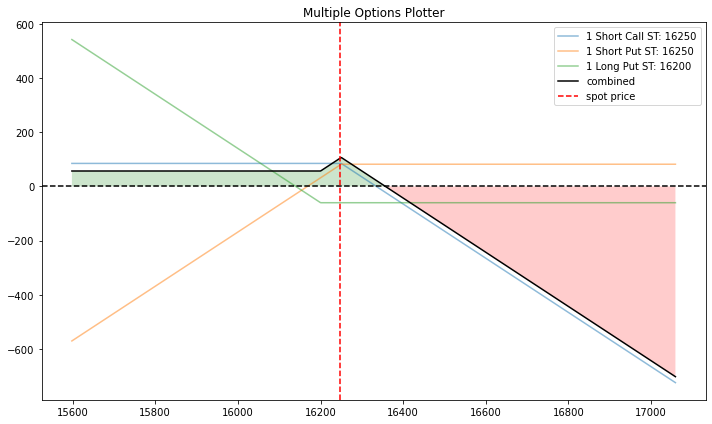

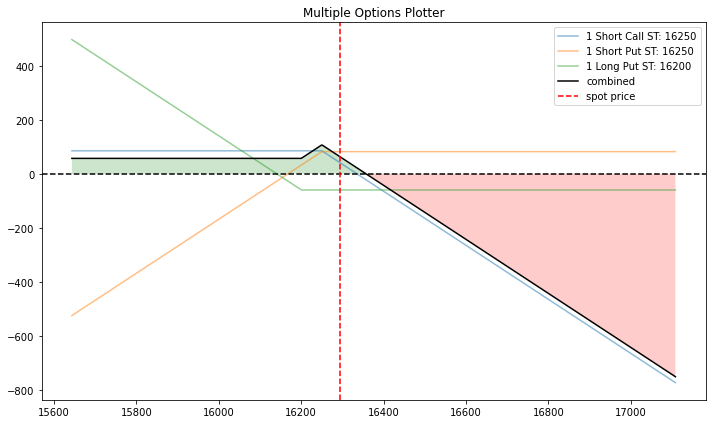

0.16583747927031509
-106
-112
  datetime Type  Position  Premium  Strike Price
0    03:20   CE         1        1         16750
1    03:20   CE        -1       85         16250
2    03:20   PE        -1       82         16250
3    03:20   PE         1       60         16200
  datetime Type  Position  Premium  Strike Price
0    09:15   CE         1        2         16750
1    09:15   CE        -1       95         16250
2    09:15   PE        -1       65         16250
3    09:15   PE         1       46         16200
Margin For 1 twisted sisters 104100.0
Quantity =  3
Capital Used = 312300.0 
P&L2 = -900


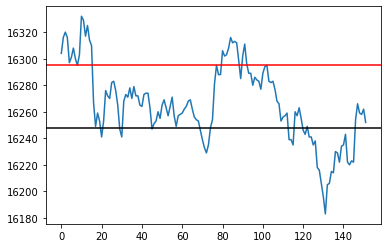

In [44]:
def backtest_daywise(df1 , df2 ,df3,df4, dnn ) :
    import math
    Total_Premium = df1[4]['Position'][0]*df1[4]['Premium'][0] + df1[4]['Position'][1]*df1[4]['Premium'][1] + df1[4]['Position'][2]*df1[4]['Premium'][2]+df1[4]['Position'][3]*df1[4]['Premium'][3] 
    Total_B_Premium = df2[4]['Position'][0]*df2[4]['Premium'][0] + df2[4]['Position'][1]*df2[4]['Premium'][1] + df2[4]['Position'][2]*df2[4]['Premium'][2]+df2[4]['Position'][3]*df2[4]['Premium'][3]
    gap_up_down = nifty['ovi%'].iloc[dnn]
    chart = pd.concat([df4.close, df3.close]).reset_index()
    spot_price1 = int(float(df4.close.iloc[74]))
    spot_price2 = int(float(df3.close.iloc[1]))
    #op1={'op_type': 'c', 'strike': df2[4]['Strike Price'][0], 'tr_type': 'b', 'op_pr': df2[4]['Premium'][0]}
    op2={'op_type': 'c', 'strike': df2[4]['Strike Price'][1], 'tr_type': 's', 'op_pr': df2[4]['Premium'][1]}
    op3={'op_type': 'p', 'strike': df2[4]['Strike Price'][2], 'tr_type': 's', 'op_pr':  df2[4]['Premium'][2]}
    op4={'op_type': 'p', 'strike': df2[4]['Strike Price'][3], 'tr_type': 'b', 'op_pr':  df2[4]['Premium'][3]}
    oplist=[ op2, op3, op4]
    op.multi_plotter(spot=spot_price1  ,spot_range=4, op_list=oplist)
    
    op22={'op_type': 'c', 'strike': df2[4]['Strike Price'][1], 'tr_type': 's', 'op_pr': df2[4]['Premium'][1]}
    op33={'op_type': 'p', 'strike': df2[4]['Strike Price'][2], 'tr_type': 's', 'op_pr':  df2[4]['Premium'][2]}
    op44={'op_type': 'p', 'strike': df2[4]['Strike Price'][3], 'tr_type': 'b', 'op_pr':  df2[4]['Premium'][3]}
    oplist1=[ op22, op33, op44]
    op.multi_plotter(spot=spot_price2  ,spot_range=4, op_list=oplist1)
    #chart = df3.close.concat(df4.close)
    #print( spot_price ) 
    print(gap_up_down)
    print(Total_B_Premium)
    print(Total_Premium)
    print(df2[4])
    print(df1[4])
    chart.close.astype(float).astype(int).plot()
    plt.axhline(spot_price1, color='black')
    plt.axhline(spot_price2, color='red')
    notional_value1 = (df2[4]['Strike Price'][1])*50
    span1 = (notional_value1*0.1)
    exposure1 = (notional_value1*0.06)
    margin_opt_selling1 = (span1 + exposure1)*0.5
    notional_value2 = (df2[4]['Strike Price'][2])*50
    span2 = (notional_value2*0.1)
    exposure2 = (notional_value2*0.06)
    margin_opt_selling2 = (span1 + exposure1)*0.3
    margin_option_buying1 = (df2[4]['Premium'][0])*50
    margin_option_buying2 = (df2[4]['Premium'][3])*50
    margin = margin_opt_selling1 + margin_opt_selling2 +margin_option_buying1 + margin_option_buying1
    q1 = math.floor( 400000/  margin )
    print(f'Margin For 1 twisted sisters {margin}' )
    print(f'Quantity =  {q1}' )
    print(f'Capital Used = {margin*q1} ' )
    
    print(f'P&L2 = {q1*50*( (Total_Premium) - (Total_B_Premium) )}' )
   
    

n = 147
backtest_daywise(np.array(intaraday_options_data(n)), np.array(previous_intaraday_options_data(n)) , nifty_intraday_data(n), nifty_intraday_data(n-1), n )

In [8]:
np.array(previous_intaraday_options_data(12))[4]

,datetime,Type,Position,Premium,Strike Price
0,03:20,CE,1,8,14750
1,03:20,CE,-1,116,14250
2,03:20,PE,-1,127,14250
3,03:20,PE,1,101,14200


In [9]:
np.array(intaraday_options_data(12, 2))[4]

,datetime,Type,Position,Premium,Strike Price
0,09:15,CE,1,5,14900
1,09:15,CE,-1,106,14400
2,09:15,PE,-1,102,14400
3,09:15,PE,1,80,14350


In [10]:
type(np.array(previous_intaraday_options_data(12))[4]['Position'][0])

numpy.int32

In [11]:
type(np.array(previous_intaraday_options_data(12))[4]['Premium'][0])

numpy.int32